In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
# model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# IMPORT DATA

In [40]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Meta Data
- Title: Wine Quality
- Source: Wine Quality | Kaggle
- Size: 390.38 kB
- Shape: 13 columns, 6497 rows
- Information:
    + Fixed acidity
    + Volatile acidity
    + Citric acid
    + Residual sugar
    + Chlorides
    + Free sulfur dioxide
    + Total sulfur dioxide
    + Density
    + pH
    + Sulphates
    + Alcohol
    + Quality 

# DATA DESCRIPTION

In [41]:
df.shape

(6497, 13)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [43]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# DATA CLEANING

Duplicated Value

In [44]:
df[df.duplicated(keep=False)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6477,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [45]:
# drop duplicates
df = df.drop_duplicates()
df.shape

(5329, 13)

Missing Value

In [46]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [47]:
# split data into 2 parts: 
# df_null: data containing nulls
# df: data after nulls removal

#  df_null
df_null = df[df.isna().any(axis=1)]

# df_null
df = df.dropna()

print(df.shape)
df.isnull().sum()

(5295, 13)


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

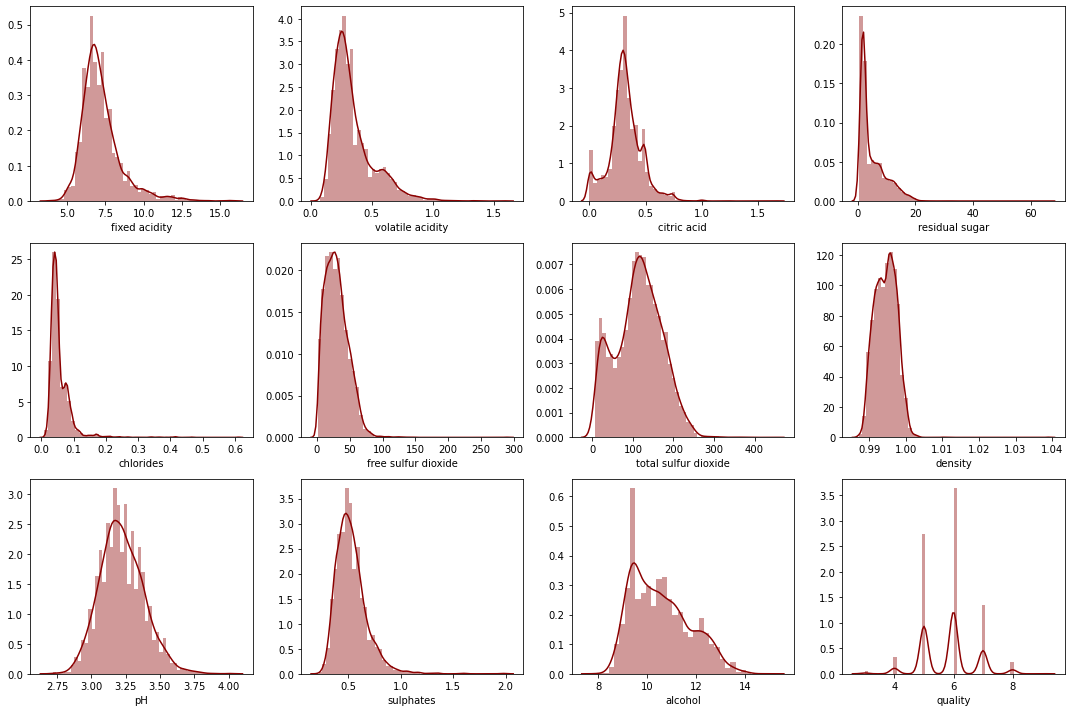

In [48]:
# Visualize the distribution of dataset 
plt.figure(figsize=(15,10))

columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
for ind, col in enumerate(columns):
    plt.subplot(3,4, ind+1)
    sns.distplot(df[col], color='darkred')
plt.tight_layout()
plt.show()

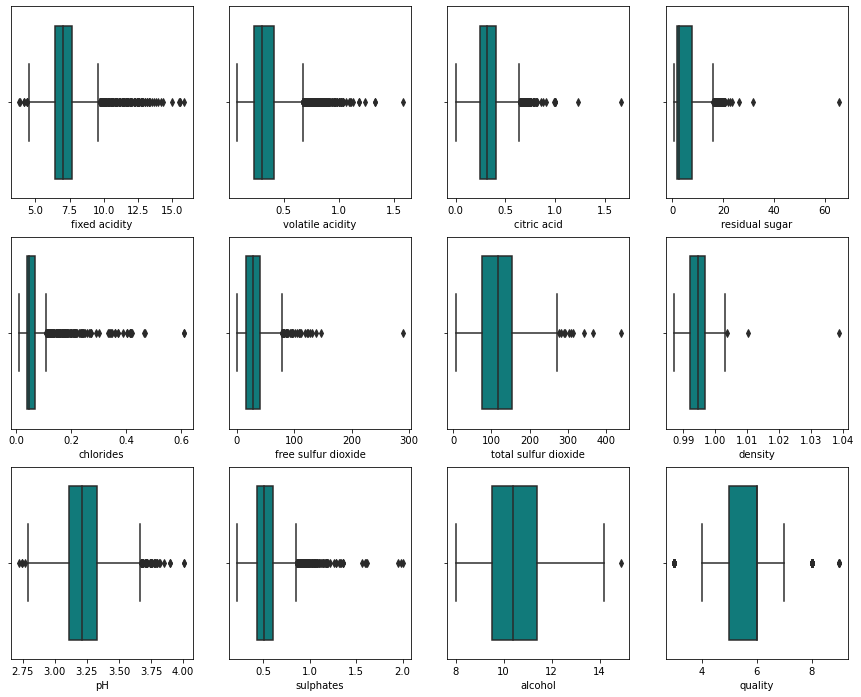

In [49]:
# detect outlier
plt.figure(figsize=(15,12))
for ind, col in enumerate(df.columns[1:]):
    plt.subplot(3,4, ind+1)
    sns.boxplot(data=df, x=col, color='darkcyan')

Handling Outlier


In [50]:
# detective outlier
def zscore_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

def iqr_outliers(seri):
    outliers = []
    Q1, Q3= np.percentile(seri,[25,75])
    IQR = Q3 - Q1 
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    for ele in seri: 
        if ele>upper_fence or ele<lower_fence:
            outliers.append(ele)
    return outliers

In [51]:
# count outliers
cnt = 0
out_quality = []
print('---- Number of outlier in each column ----')
for i in df.columns[1:]:
    li =  iqr_outliers(df[i])
    cnt += len(li)
    if i == 'quality':
        out_quality = li
    print(f'{i}: {len(li)}')
print('Total outlier of dataset:', cnt)

---- Number of outlier in each column ----
fixed acidity: 303
volatile acidity: 278
citric acid: 143
residual sugar: 140
chlorides: 235
free sulfur dioxide: 44
total sulfur dioxide: 10
density: 3
pH: 49
sulphates: 163
alcohol: 1
quality: 183
Total outlier of dataset: 1552


In [52]:
# remove outlier
def iqr_outliers(seri):
    q1 = seri.quantile(0.25)
    q3 = seri.quantile(0.75)
    iqr = q3 - q1
    up_fence = q3 + 1.5*iqr 
    low_fence = q1 - 1.5*iqr 
    return low_fence, up_fence

for col in df.columns[1:-1]:
    low, up = iqr_outliers(df[col])
    df = df[(df[col] > low) & (df[col] < up)]
df.shape

(3644, 13)

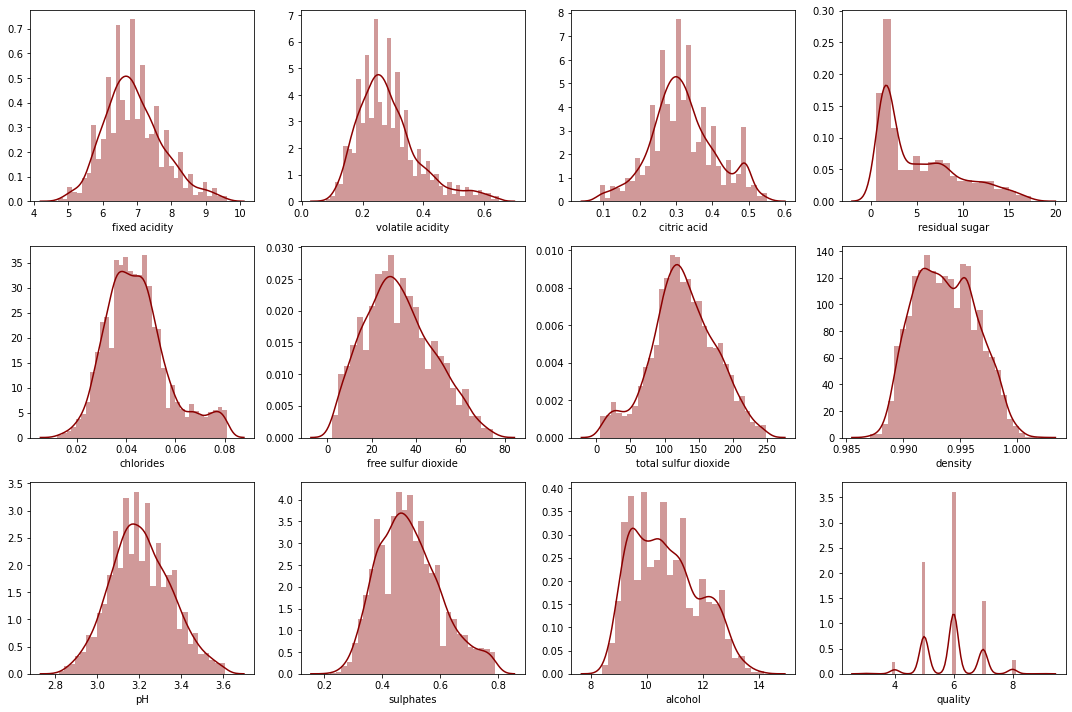

In [53]:
# visualize the distribution of dataset after removing outlier
plt.figure(figsize=(15,10))

columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
for ind, col in enumerate(columns):
    plt.subplot(3,4, ind+1)
    sns.distplot(df[col], color='darkred')
plt.tight_layout()
plt.show()

Filling missing value

In [54]:
# concat df_null and df (after removing outliers)
df = pd.concat([df, df_null])

In [55]:
# Filling missing value with mean
for col in df.columns.drop(['type','quality']):
    df[col].fillna(df[col].mean(), inplace=True)

In [56]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Transform: type and quality columns

In [57]:
map1 = {'white':1, 'red':0}
df['type'] = df['type'].map(map1)
df 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,6.300000,0.300000,0.34,1.6,0.049,14.0,132.0,0.99400,3.300000,0.490000,9.5,6
2,1,8.100000,0.280000,0.40,6.9,0.050,30.0,97.0,0.99510,3.260000,0.440000,10.1,6
3,1,7.200000,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.190000,0.400000,9.9,6
6,1,6.200000,0.320000,0.16,7.0,0.045,30.0,136.0,0.99490,3.180000,0.470000,9.6,6
9,1,8.100000,0.220000,0.43,1.5,0.044,28.0,129.0,0.99380,3.220000,0.450000,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,0,6.400000,0.530000,0.09,3.9,0.123,14.0,31.0,0.99680,3.500000,0.494801,11.0,4
6428,0,6.897165,0.440000,0.09,2.2,0.063,9.0,18.0,0.99444,3.210169,0.690000,11.3,6
6429,0,6.897165,0.705000,0.10,2.8,0.081,13.0,28.0,0.99631,3.210169,0.660000,10.2,5
6486,0,7.200000,0.286313,0.33,2.5,0.068,34.0,102.0,0.99414,3.270000,0.780000,12.8,6


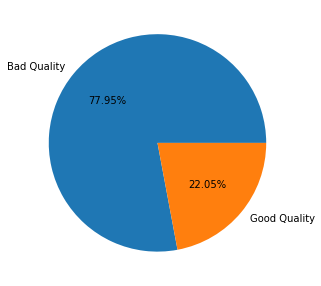

In [58]:
#Discretization using cut method of pandas package

cut_labels = [0,1]
cut_bins = [0,6,10] #0: min, 100: max
df['quality'] = pd.cut(df['quality'], bins=cut_bins, labels=cut_labels)
df['quality'].value_counts()

# plot distribution
fig= plt.figure(figsize=(6,5))

value=(df['quality'].value_counts())/len(df['quality'])
labels= ['Bad Quality', 'Good Quality']
plt.pie(value, labels = labels, autopct='%.2f%%')

plt.show()

# FEATURE SELECTION

Correlation

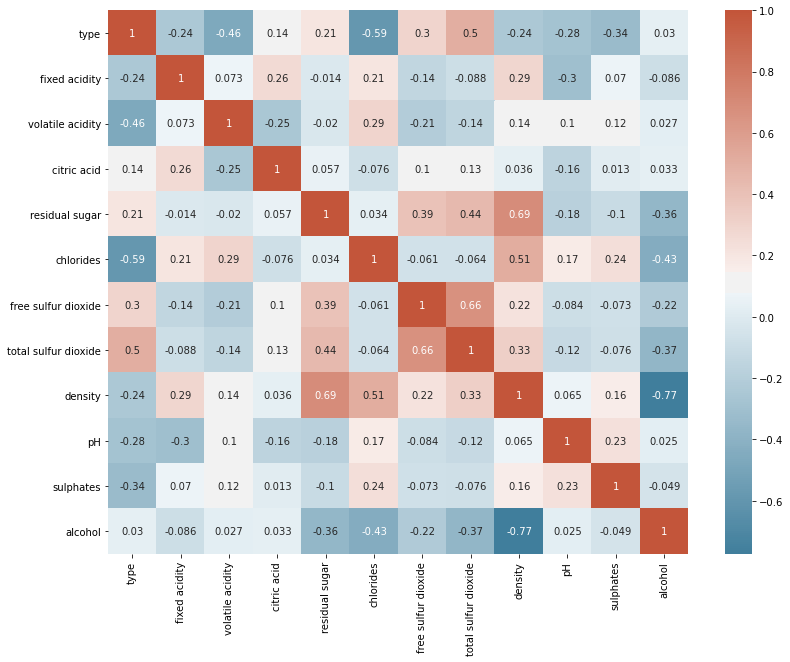

In [59]:
# pearson correlationo
corr = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plotting
plt.figure(figsize=(13,10))
sns.heatmap(data=corr,annot=True, cmap=cmap)
plt.show()

Multicollinearity

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'grade') should not be included in variables
# categorical variables may or maynot be added if any
variables = df.drop('quality',axis=1)
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,4.332238e+06,const
1,4.413121e+00,type
2,3.231651e+00,fixed acidity
3,1.477923e+00,volatile acidity
4,1.220982e+00,citric acid
5,1.170887e+01,residual sugar
6,2.264635e+00,chlorides
7,2.041116e+00,free sulfur dioxide
8,3.043874e+00,total sulfur dioxide
9,3.119042e+01,density


# Build Model

Scaling data

In [61]:
x = df.drop(columns={'quality'},axis=1)
y = df['quality']

In [62]:
# scaling features with minmaxscaler
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

Split dataset

In [63]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=365)

print('Train size:', len(y_train))
print(y_train.value_counts())
print('-----------------------')
print('Test size', len(y_test))
print(y_test.value_counts())

Train size: 2942
0    2303
1     639
Name: quality, dtype: int64
-----------------------
Test size 736
0    564
1    172
Name: quality, dtype: int64


Generating Model

Accuracy = 0.779891304347826
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       564
           1       0.56      0.28      0.38       172

    accuracy                           0.78       736
   macro avg       0.68      0.61      0.62       736
weighted avg       0.75      0.78      0.75       736



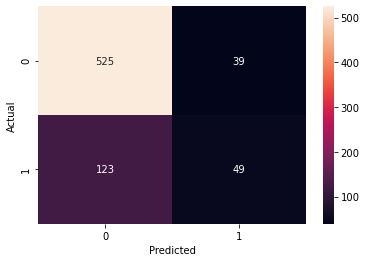

In [64]:
# model
reg = LogisticRegression() 
reg.fit(X_train,y_train) 
y_pred = reg.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# cassification report
print(classification_report(y_test,y_pred))

# confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

HANDLING WITH IMBLANCED DATA

In [65]:
# handle balance 
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42) 
X_train, y_train = sm.fit_resample(X_train, y_train)

print('Train size:', len(y_train))
print(y_train.value_counts())
print('-----------------------')
print('Test size', len(y_test))
print(y_test.value_counts())

Train size: 4606
1    2303
0    2303
Name: quality, dtype: int64
-----------------------
Test size 736
0    564
1    172
Name: quality, dtype: int64


Generating model after balancing data

Accuracy = 0.7105978260869565
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       564
           1       0.43      0.71      0.53       172

    accuracy                           0.71       736
   macro avg       0.66      0.71      0.66       736
weighted avg       0.78      0.71      0.73       736



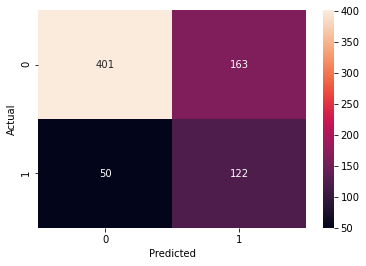

In [66]:
# model
reg = LogisticRegression() 
reg.fit(X_train,y_train) 
y_pred = reg.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# cassification report
print(classification_report(y_test,y_pred))

# confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

# MODEL SELECTION

Choosing Algorithm:
- Logistic Regression
- Decision Tree
- K nearest neighbors
- Perceptron

cross-valid

Accuracy = 0.7350543478260869
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       574
           1       0.44      0.77      0.56       162

    accuracy                           0.74       736
   macro avg       0.68      0.75      0.69       736
weighted avg       0.81      0.74      0.76       736



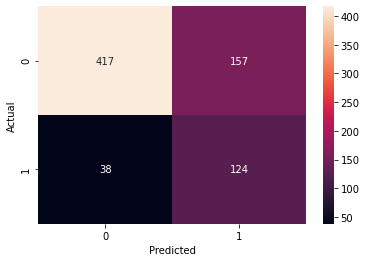

In [67]:
# Assigning X and y
x = df.drop(columns=['quality'],axis=1)
y = df[['quality']]

# Scaling features
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=69)

# Handle balance 
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42) 
X_train, y_train = sm.fit_resample(X_train, y_train)

# Model
reg = LogisticRegression() 
reg.fit(X_train,y_train) 
y_pred = reg.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# Cassification report
print(classification_report(y_test,y_pred))

# Confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

Feature Selection:
- alcohol
- residual sugar
- density

K nearest neighbors

In [68]:
# Assigning X and y
x = df.drop(columns=['quality'],axis=1)
y = df['quality']

# Scaling features
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=365)

- Train model with k = 3

Accuracy: 0.7948369565217391
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       564
           1       0.57      0.48      0.52       172

    accuracy                           0.79       736
   macro avg       0.71      0.69      0.70       736
weighted avg       0.78      0.79      0.79       736



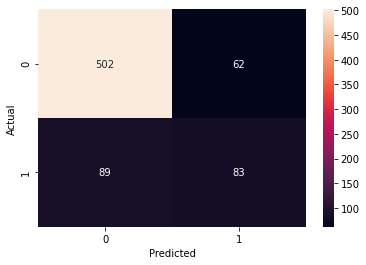

In [69]:

knn = KNeighborsClassifier(n_neighbors=3,p=2,weights='distance')
knn.fit(X_train,y_train.values.ravel())
y_predict3 = knn.predict(X_test)

# Accuracy
acc3 = accuracy_score(y_test,y_predict3)
print(f'Accuracy: {acc3}')

# Cassification report
print(classification_report(y_test,y_predict3))

# Confustion matrix
cm3 = confusion_matrix(y_test, y_predict3)
ax = sns.heatmap(cm3, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

- Train model with k = 7

Accuracy: 0.8043478260869565
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       564
           1       0.61      0.45      0.52       172

    accuracy                           0.80       736
   macro avg       0.73      0.68      0.70       736
weighted avg       0.79      0.80      0.79       736



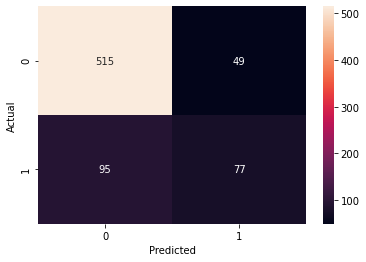

In [70]:

knn = KNeighborsClassifier(n_neighbors=7,p=2,weights='distance')
knn.fit(X_train,y_train.values.ravel())
y_predict7 = knn.predict(X_test)

# Accuracy
acc3 = accuracy_score(y_test,y_predict7)
print(f'Accuracy: {acc3}')

# Cassification report
print(classification_report(y_test,y_predict7))

# Confustion matrix
cm7 = confusion_matrix(y_test, y_predict7)
ax = sns.heatmap(cm7, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

Naive Bayes

Accuracy = 0.6684782608695652
              precision    recall  f1-score   support

           0       0.92      0.62      0.74       564
           1       0.40      0.83      0.54       172

    accuracy                           0.67       736
   macro avg       0.66      0.72      0.64       736
weighted avg       0.80      0.67      0.69       736



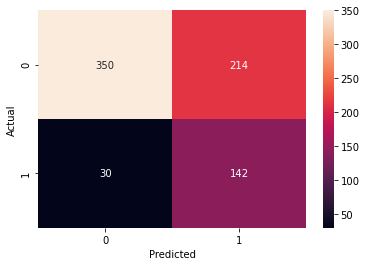

In [71]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Assigning X and y
x = df.drop(columns=['quality'],axis=1)
y = df['quality']

# Scaling features
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=365)

# Handle balance 
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42) 
X_train, y_train = sm.fit_resample(X_train, y_train)

# Model
gnb = GaussianNB()
gnb.fit(X_train,y_train) 
y_pred = gnb.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# Cassification report
print(classification_report(y_test,y_pred))

# Confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

Perceptron

Accuracy = 0.6073369565217391
              precision    recall  f1-score   support

           0       0.96      0.51      0.67       564
           1       0.37      0.92      0.52       172

    accuracy                           0.61       736
   macro avg       0.66      0.72      0.59       736
weighted avg       0.82      0.61      0.63       736



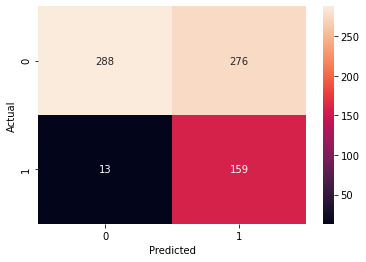

In [72]:
# Assigning X and y
x = df.drop(columns=['quality'],axis=1)
y = df['quality']

# Scaling features
mms = MinMaxScaler()
mms.fit(x)
scaled_x = mms.transform(x)

# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2,random_state=365)

# Handle balance 
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42) 
X_train, y_train = sm.fit_resample(X_train, y_train)

# Model
per = Perceptron() 
per.fit(X_train,y_train) 
y_pred = per.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# Cassification report
print(classification_report(y_test,y_pred))

# Confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

In [73]:
import pandas as pd

records = [('Logistic Regresstion', 0.74, 0.77, 0.56), 
           ('K Nearnest Neighbor', 0.79, 0.48, 0.52),
           ('Naive Bayes', 0.67, 0.83, 0.54), 
           ('Perceptron', 0.61, 0.92, 0.52)]

# Khởi tạo DataFrame
df = pd.DataFrame(data = records, columns = ['Model', 'accuracy', 'recall', 'f1_score'])
df

,Model,accuracy,recall,f1_score
0,Logistic Regresstion,0.74,0.77,0.56
1,K Nearnest Neighbor,0.79,0.48,0.52
2,Naive Bayes,0.67,0.83,0.54
3,Perceptron,0.61,0.92,0.52


In [74]:
col = list(df['accuracy']) + list(df['recall']) + list(df['f1_score'])
stats = ['accuracy','accuracy','accuracy','accuracy','recall','recall','recall','recall','f1_score','f1_score','f1_score','f1_score']
df_2 = pd.DataFrame()
df_2['score']= list(col)
df_2['algo'] = list(df['Model'])*3
df_2['stats'] = stats
df_2

,score,algo,stats
0,0.74,Logistic Regresstion,accuracy
1,0.79,K Nearnest Neighbor,accuracy
2,0.67,Naive Bayes,accuracy
3,0.61,Perceptron,accuracy
4,0.77,Logistic Regresstion,recall
5,0.48,K Nearnest Neighbor,recall
6,0.83,Naive Bayes,recall
7,0.92,Perceptron,recall
8,0.56,Logistic Regresstion,f1_score
9,0.52,K Nearnest Neighbor,f1_score


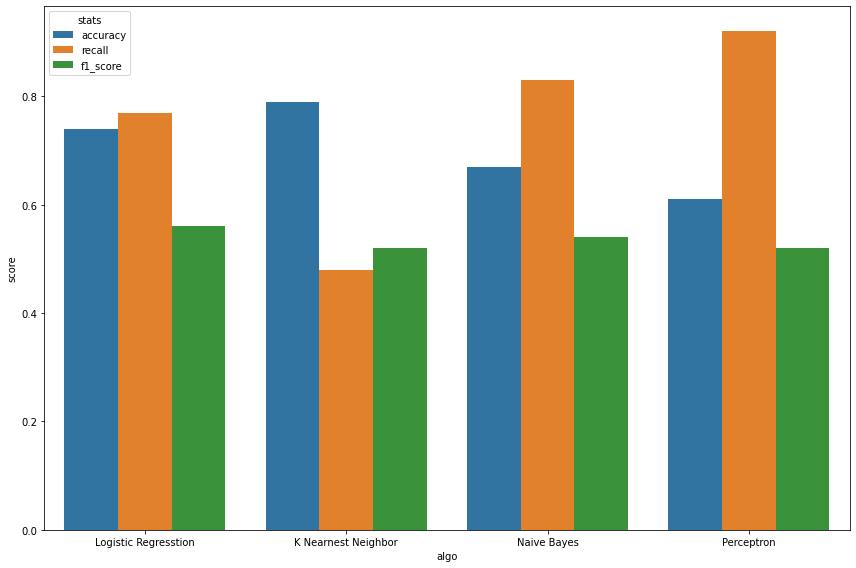

In [75]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=df_2 , x='algo', y='score', hue="stats")
plt.tight_layout()